# Bike Thefts Berlin - EDA

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [108]:
PATH = '../data'

In [109]:
time_parseable = ['start_date_delict', 'end_date_delict']

## Prep data inspection

In [110]:
class BikeThefts():
    '''Read, inspect and transform initial data.'''

    def __init__(self, path = PATH) -> None:
        self.path = path

    def read_initial_data(self, file) -> pd.DataFrame:
        '''Return DataFrame with feature matrix and labels as values.'''
        df = pd.read_csv(f'{self.path}/{file}', index_col=0, parse_dates=True, encoding = 'unicode_escape')
        return df

    def read_extracted_data(self, file) -> pd.DataFrame:
        '''Return DataFrame extracted from initial data.'''
        df = pd.read_csv(f'{self.path}/{file}', encoding = 'unicode_escape')
        return df
    
    def check_unique(self, serie) -> pd.Series:
        '''Return unique values of selected columns.'''
        return serie.unique()

    def include_timestamps(self, df) -> pd.DataFrame:
        '''Return DataFrame with time-stamps.'''
        df['year'] = df.index.year
        df['month'] = df.index.month
        return df

    def time_parser(self, df, time_parsables) -> pd.DataFrame:
        '''Parse columns encoded as strings to datetime-objects.'''
        for col in time_parsables:
            df[col] = pd.to_datetime(df[col])
        return df

    def crime_duration_days(self, df, start, end) -> pd.DataFrame: #use for plotting?
        '''Calculate duration of crime in days.'''
        df['crime_duration_days'] = end - start
        return df
    
    def crime_duration_hours(self, df, start, end) -> pd.DataFrame: #use for plotting?
        '''Calculate duration of crime in hours.'''
        df['crime_duration_hours'] = abs(start - end)
        return df
    
    def fill_ints(self, df) -> pd.DataFrame:
        '''Reencode LOR into 8-digit values.'''
        df['LOR'] = df['LOR'].apply(lambda x: str(x))
        df['LOR'] = df['LOR'].apply(lambda x: f'0{(x)}'[-8:])
        return df
    
    def fill_ints_grouped(self, df) -> pd.DataFrame:
        '''Group by LOR. Return df including number of bike thefts per LOR-group.'''
        df_grouped = pd.DataFrame(df.groupby('LOR').size(),
                          columns=['bike_thefts']).reset_index()
        return df_grouped
        
    def rename_cols(self, df) -> pd.DataFrame:
        return df.rename(columns={ 
            'ANGELEGT_AM' : 'track_date',
            'TATZEIT_ANFANG_DATUM' : 'start_date_delict',
            'TATZEIT_ANFANG_STUNDE' : 'start_time_delict',
            'TATZEIT_ENDE_DATUM' : 'end_date_delict',
            'TATZEIT_ENDE_STUNDE' : 'end_time_delict',
            'SCHADENSHOEHE' : 'damage_amount',
            'VERSUCH' : 'intent_delict',
            'ART_DES_FAHRRADS' : 'bike_type',
            'DELIKT' : 'delict',
            'ERFASSUNGSGRUND' : 'description'
            })
    
    def reencode_LOR(self, df, dictionary) -> pd.DataFrame:
        '''Reencode LOR into name of district.'''
        for idx, row in df['LOR'].items():
            for key in dictionary.keys():
                if key in row[0:2]:
                    row = dictionary[key]
                else:
                    continue
            return df
    
    def save_intermediate_data(self, df, file: str):
        '''Save extracted data locally as csv-file.'''
        return df.to_csv(f'{self.path}/{file}.csv')

    def save_LOR_bike_thefts(self, df, group_by: str, col_names: str, file: str):
        '''Save extracted LOR-bike thefts-data locally as csv-file.'''
        bike_thefts_LOR = pd.DataFrame(df.groupby(group_by).size(),
                        columns = [col_names]).reset_index()
        return bike_thefts_LOR.to_csv(f'{self.path}/{file}.csv')

In [111]:
# class PlotBikeThefts():
#     '''Plot data with seaborn.'''

#     def plot_categoricals(self, df, ordinate) -> sns:
#             return sns.catplot(
#             data=df, y=ordinate, kind="count",
#             palette="pastel", edgecolor=".6",
#         )

#     def plot_correlations(self, df) -> sns:
#         corr = df.corr()
#         mask = np.triu(np.ones_like(corr, dtype=bool))
#         f, ax = plt.subplots(figsize=(8, 6))
#         plt.xticks(rotation=45)
#         cmap = sns.diverging_palette(230, 20, as_cmap=True)
#         return sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#                     square=True, linewidths=.5, cbar_kws={"shrink": .5})
    

## Create transformed dataset

In [112]:
bike_thefts = BikeThefts()

In [113]:
df = bike_thefts.read_initial_data('Fahrraddiebstahl.csv')
df.head()

,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND
ANGELEGT_AM,,,,,,,,,,
2023-02-19,18.02.2023,18,19.02.2023,7,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,18.02.2023,20,19.02.2023,9,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,18.02.2023,16,19.02.2023,0,6100102,746,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,18.02.2023,17,19.02.2023,0,7601544,1849,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,17.02.2023,17,17.02.2023,17,3601346,1863,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


In [114]:
df = bike_thefts.rename_cols(df)
df.columns

Index(['start_date_delict', 'start_time_delict', 'end_date_delict',
       'end_time_delict', 'LOR', 'damage_amount', 'intent_delict', 'bike_type',
       'delict', 'description'],
      dtype='object')

## Parse time

In [115]:
df_transformed = bike_thefts.time_parser(df, time_parseable)
df_transformed.head(3)

,start_date_delict,start_time_delict,end_date_delict,end_time_delict,LOR,damage_amount,intent_delict,bike_type,delict,description
ANGELEGT_AM,,,,,,,,,,
2023-02-19,2023-02-18,18,2023-02-19,7,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,2023-02-18,20,2023-02-19,9,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,2023-02-18,16,2023-02-19,0,6100102,746,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


In [116]:
df_transformed = bike_thefts.crime_duration_days(df_transformed, 
                                            start=df_transformed['start_date_delict'], 
                                            end = df_transformed['end_date_delict'])

In [117]:
df_transformed = bike_thefts.crime_duration_hours(df_transformed, 
                                            start=df_transformed['start_time_delict'], 
                                            end = df_transformed['end_time_delict'])
df_transformed.columns

Index(['start_date_delict', 'start_time_delict', 'end_date_delict',
       'end_time_delict', 'LOR', 'damage_amount', 'intent_delict', 'bike_type',
       'delict', 'description', 'crime_duration_days', 'crime_duration_hours'],
      dtype='object')

In [118]:
df_transformed = bike_thefts.include_timestamps(df_transformed)
df_transformed.columns

Index(['start_date_delict', 'start_time_delict', 'end_date_delict',
       'end_time_delict', 'LOR', 'damage_amount', 'intent_delict', 'bike_type',
       'delict', 'description', 'crime_duration_days', 'crime_duration_hours',
       'year', 'month'],
      dtype='object')

In [119]:
df_transformed = bike_thefts.fill_ints(df_transformed)
df_transformed.columns

Index(['start_date_delict', 'start_time_delict', 'end_date_delict',
       'end_time_delict', 'LOR', 'damage_amount', 'intent_delict', 'bike_type',
       'delict', 'description', 'crime_duration_days', 'crime_duration_hours',
       'year', 'month'],
      dtype='object')

In [120]:
df_transformed.head(2)

,start_date_delict,start_time_delict,end_date_delict,end_time_delict,LOR,damage_amount,intent_delict,bike_type,delict,description,crime_duration_days,crime_duration_hours,year,month
ANGELEGT_AM,,,,,,,,,,,,,,
2023-02-19,2023-02-18,18,2023-02-19,7,03701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2
2023-02-19,2023-02-18,20,2023-02-19,9,01100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2


In [ ]:
bike_thefts.reencode_LOR(df_transformed, )

In [121]:
bike_thefts.save_intermediate_data(df_transformed, 'bike_thefts_transformed') # assign additional col with district names

## Create sub DataFrame with `LOR` and `bike_theft_count`

In [122]:
df_count_bike_thefts = bike_thefts.fill_ints_grouped(df_transformed)
df_count_bike_thefts.head(2)

,LOR,bike_thefts
0,01100101,28
1,01100102,127


In [123]:
bike_thefts.save_LOR_bike_thefts(df_count_bike_thefts, 'LOR', 'bike_thefts_count', 'bike_thefts_LOR' )

## Extract dataframes for individual years

In [124]:
extract_2022 = df_transformed.loc['2022-01-01':'2022-12-31']

In [125]:
checkable = ['start_date_delict', 'end_date_delict', 'start_time_delict', 'end_time_delict']

for col in checkable:
    assert 2023 not in extract_2022[col]  # write a test function out of this

In [126]:
bike_thefts.save_intermediate_data(extract_2022, 'bike_thefts_df_2022')

In [127]:
extract_22_resampled = extract_2022.resample('M')
extract_22_resampled = extract_22_resampled['LOR', 'damage_amount'].mean().round(2)
extract_22_resampled.head(2)

,damage_amount
ANGELEGT_AM,
2022-01-31,1022.89
2022-02-28,1056.65


In [128]:
bike_thefts.save_intermediate_data(extract_22_resampled, 'extract_22_resampled')

In [129]:
extract_2023 = df_transformed.loc['2023-01-01':'2023-02-19']
extract_2023.head(2)

,start_date_delict,start_time_delict,end_date_delict,end_time_delict,LOR,damage_amount,intent_delict,bike_type,delict,description,crime_duration_days,crime_duration_hours,year,month
ANGELEGT_AM,,,,,,,,,,,,,,
2023-02-19,2023-02-18,18,2023-02-19,7,03701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2
2023-02-19,2023-02-18,20,2023-02-19,9,01100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2


In [130]:
bike_thefts.save_intermediate_data(extract_2023, 'bike_thefts_df_2023')

In [131]:
checkable = ['start_date_delict', 'end_date_delict', 'start_time_delict', 'end_time_delict']

for col in checkable:
    assert 2022 not in extract_2023[col]  # write a test function out of this

In [132]:
extract_23_resampled = extract_2023.resample('M')
extract_23_resampled = extract_23_resampled['LOR', 'damage_amount'].mean().round(2)
extract_23_resampled.head(2)

,damage_amount
ANGELEGT_AM,
2023-01-31,1227.39
2023-02-28,1188.38


In [133]:
bike_thefts.save_intermediate_data(extract_23_resampled, 'extract_23_resampled')

## Extract series for individual years and plot numeric data: "Schadenshöhe"

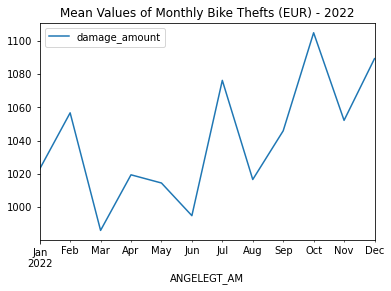

In [134]:
extract_22_resampled.plot.line(title = 'Mean Values of Monthly Bike Thefts (EUR) - 2022'); #how can this be rendered in app?

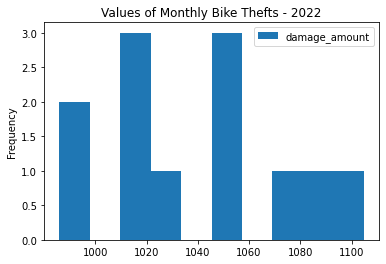

In [135]:
extract_22_resampled.plot.hist(bins = 10, title = 'Values of Monthly Bike Thefts - 2022'); #how can this be rendered in app?

## Extract series for individual years and plot numeric data: thefts

In [136]:
extract_2022.reset_index(inplace=True)

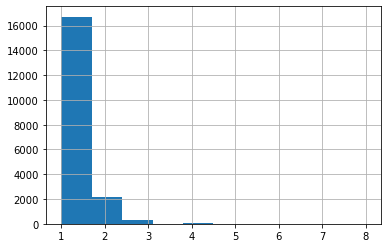

In [137]:
bike_thefts_series_22 = pd.DataFrame(extract_2022.groupby(['LOR', 'ANGELEGT_AM']).size(),
                       columns = ['bike_theft_count']).reset_index()
bike_thefts_series_22 = bike_thefts_series_22.set_index(bike_thefts_series_22['ANGELEGT_AM'])
bike_thefts_series_22 = bike_thefts_series_22['bike_theft_count']
bike_thefts_series_22.hist(); #render in app

In [138]:
bike_thefts_series_22.describe() #render in app

count    19295.000000
mean         1.159109
std          0.444700
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: bike_theft_count, dtype: float64

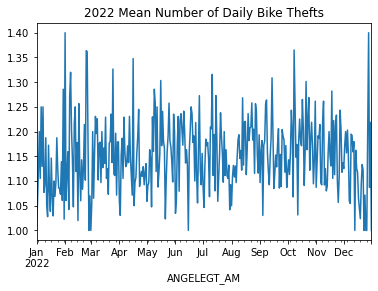

In [139]:
(bike_thefts_series_22
.resample('D')  
.mean()
.plot.line(title = '2022 Mean Number of Daily Bike Thefts') #render in app; eventually by changing frequency
);

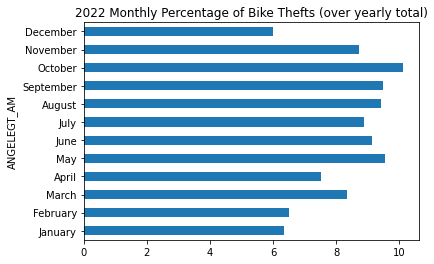

In [140]:
(bike_thefts_series_22
 .resample('M')
 .sum()
 .div(bike_thefts_series_22.sum())
 .mul(100)
 .rename(lambda idx: idx.month_name())
 .plot.barh(title = '2022 Monthly Percentage of Bike Thefts (over yearly total)') #render in app
 );

In [141]:
bike_thefts.save_intermediate_data(bike_thefts_series_22, 'bike_thefts_series_2022')

In [142]:
extract_2023.reset_index(inplace=True)
extract_2023.head(2)

,ANGELEGT_AM,start_date_delict,start_time_delict,end_date_delict,end_time_delict,LOR,damage_amount,intent_delict,bike_type,delict,description,crime_duration_days,crime_duration_hours,year,month
0,2023-02-19,2023-02-18,18,2023-02-19,7,03701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2
1,2023-02-19,2023-02-18,20,2023-02-19,9,01100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2


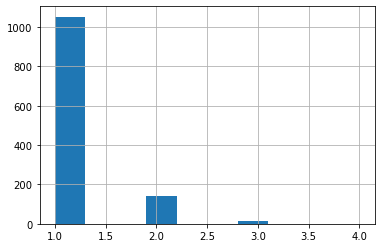

In [143]:
bike_thefts_series_23 = pd.DataFrame(extract_2023.groupby(['LOR', 'ANGELEGT_AM']).size(),
                       columns = ['bike_theft_count']).reset_index()
bike_thefts_series_23 = bike_thefts_series_23.set_index(bike_thefts_series_23['ANGELEGT_AM'])
bike_thefts_series_23 = bike_thefts_series_23['bike_theft_count']
bike_thefts_series_23.hist();

In [144]:
bike_thefts_series_23.describe() #render in app

count    1209.000000
mean        1.142266
std         0.387651
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: bike_theft_count, dtype: float64

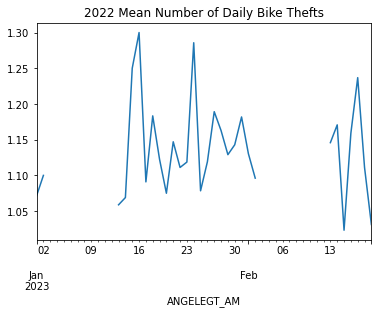

In [154]:
(bike_thefts_series_23
.resample('D')
.mean()
.plot.line(title = '2022 Mean Number of Daily Bike Thefts') #ignore
);

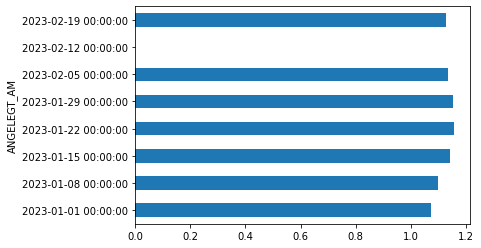

In [146]:
(bike_thefts_series_23
.resample('W')
.mean()
.plot.barh() #ignore
);

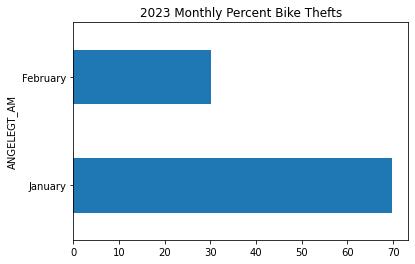

In [147]:
(bike_thefts_series_23
 .resample('M')
 .sum()
 .div(bike_thefts_series_23.sum())
 .mul(100)
 .rename(lambda idx: idx.month_name())
 .plot.barh(title = '2023 Monthly Percent Bike Thefts')
 );

In [148]:
bike_thefts.save_intermediate_data(bike_thefts_series_23, 'bike_thefts_series_2023')

In [149]:
df_transformed.drop(df_transformed.iloc[:, 0:4], axis=1, inplace=True)
df_transformed.head(2) #check

,LOR,damage_amount,intent_delict,bike_type,delict,description,crime_duration_days,crime_duration_hours,year,month
ANGELEGT_AM,,,,,,,,,,
2023-02-19,03701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2
2023-02-19,01100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2


In [150]:
df_transformed.reset_index(inplace=True)
df_transformed.head(2)

,ANGELEGT_AM,LOR,damage_amount,intent_delict,bike_type,delict,description,crime_duration_days,crime_duration_hours,year,month
0,2023-02-19,03701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2
1,2023-02-19,01100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2


In [151]:
bike_thefts_LOR_year = pd.DataFrame(df_transformed.groupby(['LOR', 'year']).size(),
                       columns = ['bike_theft_count'])
bike_thefts_LOR_year = bike_thefts_LOR_year.reset_index()
bike_thefts_LOR_year = bike_thefts_LOR_year.set_index('year').reset_index()
bike_thefts_LOR_year.head(2)

,year,LOR,bike_theft_count
0,2022,01100101,26
1,2023,01100101,2


In [152]:
bike_thefts.save_LOR_bike_thefts(
    df = bike_thefts_LOR_year, 
    group_by =['LOR', 'year'],
    col_names='bike_theft_count',
    file = 'bike_thefts_year_LOR_count'
    ) 